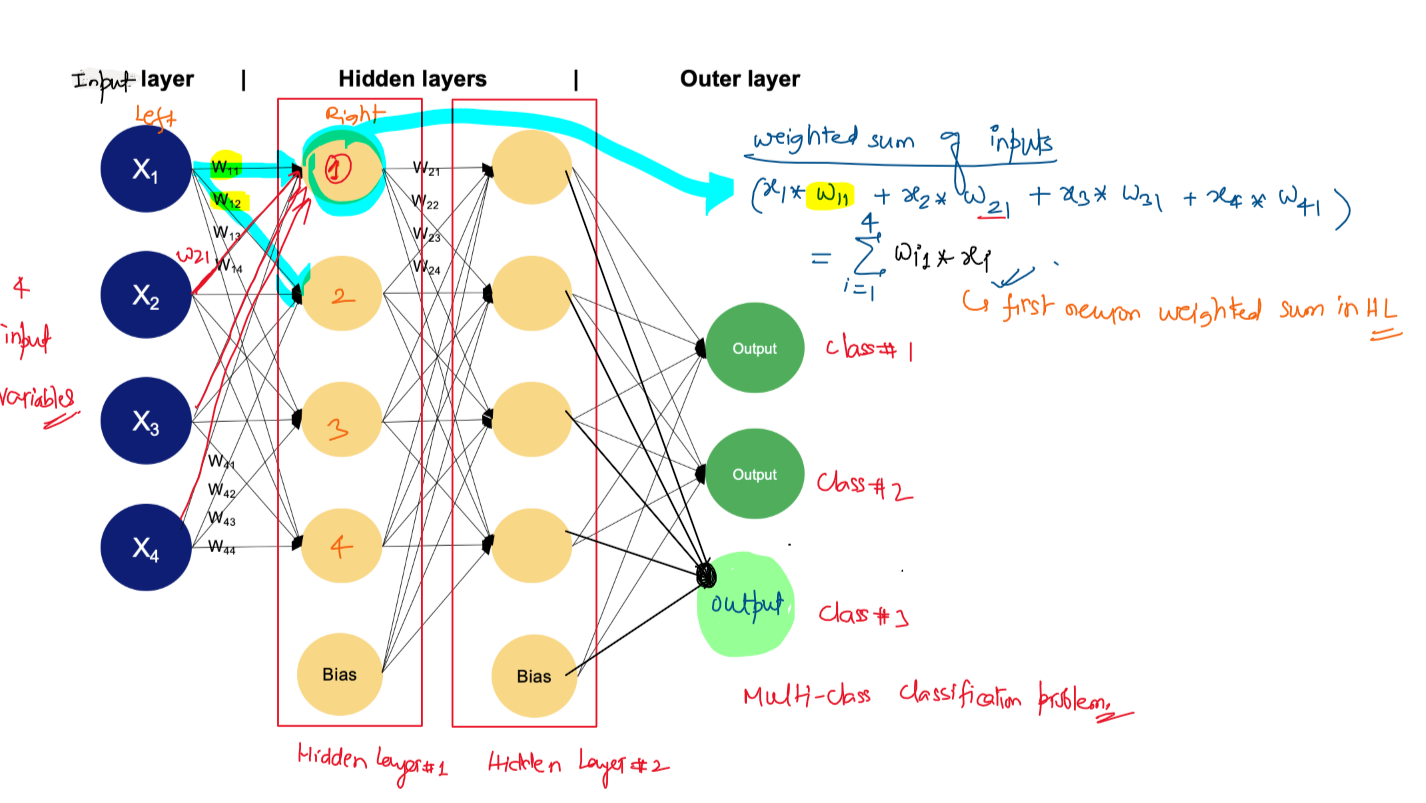

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

**Simple MLP Implementation with user-defined functions**

`MLP Implementation Architecture: `

Input Layer **-->** ONE Hidden Layer **-->** Output Layer

In [2]:
class NeuralNetwork:
  def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epochs=100):
    self.input_size = input_size #no. of input features or variables in the input layer
    self.hidden_size = hidden_size #no. of neurons in the hidden layer
    self.output_size = output_size #no. of neurons in the output layer
    self.learning_rate = learning_rate #learning rate for the gradient descent step
    self.epochs = epochs #no.of training epochs


    ### Initialize weights and biases from input layer to hidden neurons
    self.W1 = np.random.randn(self.input_size, self.hidden_size)  # input to hidden neurons --> weights
    self.b1 = np.zeros((1, self.hidden_size)) # input to hidden neuron --> bias

    ### Initialize weights and biases from hidden layer to output neurons
    self.W2 = np.random.randn(self.hidden_size, self.output_size)  # hidden neurons to output neurons --> weights
    self.b2 = np.zeros((1, self.output_size)) # hidden neuron to output neuron--> bias

    ### Loss history for plotting
    self.loss_history = [] #empty list initialized to store the loss values during training epochs

## Activation Function

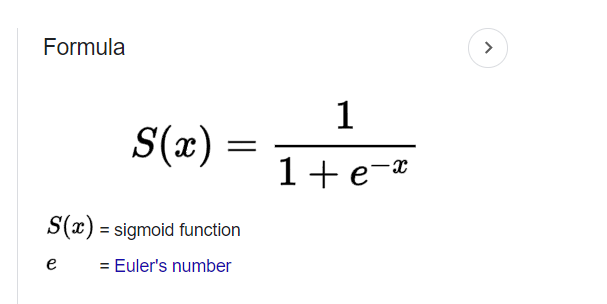

In [3]:
def sigmoid(self, x):
  return 1/(1+ np.exp(-x))

In [4]:
def softmax(self,x):
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True)) #for numerical stability
  return exp_values/np.sum(exp_values, axis=1, keepdims=True)

## Forward Propagation

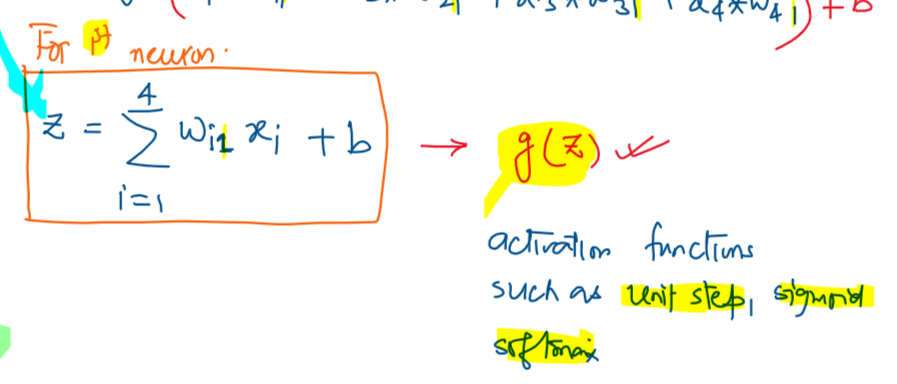

In [6]:
def forward(self, X):
  ### Forward propagation through the neural network
  self.z1 = np.dot(X, self.W1) + self.b1
  self.a1 = self.sigmoid(self.z1) #computes the activation function in the hidden layer using Sigmoid Function
  self.z2 = np.dot(self.a1, self.W2) + self.b2
  self.probs = self.sigmoid(self.z2) # computes the probabilities using Sigmoid for binary classification
  return self.probs

## Backward Propagation

- `backward` method implements backpropagation to update `weights and biases`

In [7]:
def backward(self, X, y):

  #Backpropagation to update weights and biases
  m = X.shape[0] # number of records or rows or examples

  # Gradients of the loss wrt weights and biases of the <output layer>
  delta3 = self.probs - y.reshape(-1,1)  # `y` is the actual output and self.probs is the predicted output from the forward pass
  dW2 = np.dot(self.a1.T, delta3) #Gradient of the loss wrt weights of the output layer (dW2)
  db2 = np.sum(delta3, axis=0, keepdims=True) #Gradient of the loss wrt bias of the output layer (db2)

  # Gradients of the loss wrt weights and biases of the <hidden layer>
  delta2 = np.dot(delta3, self.W2.T)*self.a1*(1-self.a1)
  dW1 = np.dot(X.T, delta2) #Gradient of th loss wrt weights of hidden layer (dW1)
  db1 = np.sum(delta2, axis=0, keepdims=True) #Gradient of the loss wrt bias of hidden layer (ab1)


  ### Update Weights and biases:
  self.W1 -= self.learning_rate *dW1
  self.b1 -= self.learning_rate *db1
  self.W2 -= self.learning_rate *dW2
  self.b2 -= self.learning_rate *db2

`-=`: subtract and assign

`delta3` is the gradient of the losses wrt to the output layer

## Training

- `training method` trains the neural network over `self.epochs` epochs
    - Performs forward propagation to compute predictions
    - Computes binary loss function
    - Backpropagates gradients and updates weights/biases
    - Prints training progress every 100 epochs


In [8]:
def train(self, X,y):
  for epoch in range(self.epochs):

    ## Forward pass
    probs = self.forward(X)

    #Compute the binary loss
    loss = -np.mean(y*np.log(probs)+ (1-y)*np.log(1-probs))
    self.loss_history.append(loss)

    ## Backward pass
    self.backward(X,y)

    ## Print the progress
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss: {loss:.4f}' )


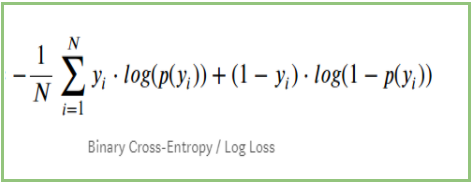

## Prediction

- `predict` method predicts class labels (0 or 1) for samples/records in 'X' based on self.probs

In [9]:
def predict(self,X):
  #predict class labels for samples in X
  probs = self.forward(X)
  return np.where(probs >=0.5, 1, 0)

**Combining all the modules**

In [252]:
np.random.randn(2, 5) * np.sqrt(1. / 2)

array([[ 0.21947593, -0.1796041 ,  0.92275797,  0.7540891 ,  0.28583206],
       [-0.1518657 ,  0.45738555, -0.69846028,  0.73458428, -0.00229638]])

In [254]:
 np.zeros((1, 5))

array([[0., 0., 0., 0., 0.]])

In [225]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epochs=100):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights and biases using Xavier initialization
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(1. / self.input_size) #Xavier initialization
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(1. / self.hidden_size) #Xavier initialization
        self.b2 = np.zeros((1, self.output_size))

        # Loss history for plotting
        self.loss_history = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1 #weighted sum from input layer to hidden layer
        self.a1 = self.relu(self.z1)  # Use ReLU for hidden layer activation
        self.z2 = np.dot(self.a1, self.W2) + self.b2 #weighted sum from hidden layer to output layer
        self.probs = self.sigmoid(self.z2)  # Sigmoid for output layer --> binary classification
        return self.probs

    def backward(self, X, y):
        m = X.shape[0] #no. of rows in the X

        delta3 = self.probs - y.reshape(-1, 1)  # Error in output layer // delta3 is the error term
        dW2 = np.dot(self.a1.T, delta3) / m # average gradient for weights in the hidden layer
        db2 = np.sum(delta3, axis=0, keepdims=True) / m #keepdims=True --the output array will have the same number of dimensions as the input array

        delta2 = np.dot(delta3, self.W2.T) * self.relu_derivative(self.z1)  # Error in hidden layer
        dW1 = np.dot(X.T, delta2) / m
        db1 = np.sum(delta2, axis=0,  keepdims=True) / m

        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X, y):
        for epoch in range(self.epochs):
            # Forward pass
            probs = self.forward(X)

            # Clip probs to avoid log(0) during loss calculation
            probs = np.clip(probs, 1e-10, 1 - 1e-10)

            # Compute binary cross-entropy loss or log-loss function
            loss = -np.mean(y * np.log(probs) + (1 - y) * np.log(1 - probs))
            self.loss_history.append(loss)

            # Backward pass
            self.backward(X, y)

            # Print progress
            if epoch % 10 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

    def predict(self, X):
        probs = self.forward(X)
        return np.where(probs >= 0.5, 1, 0)



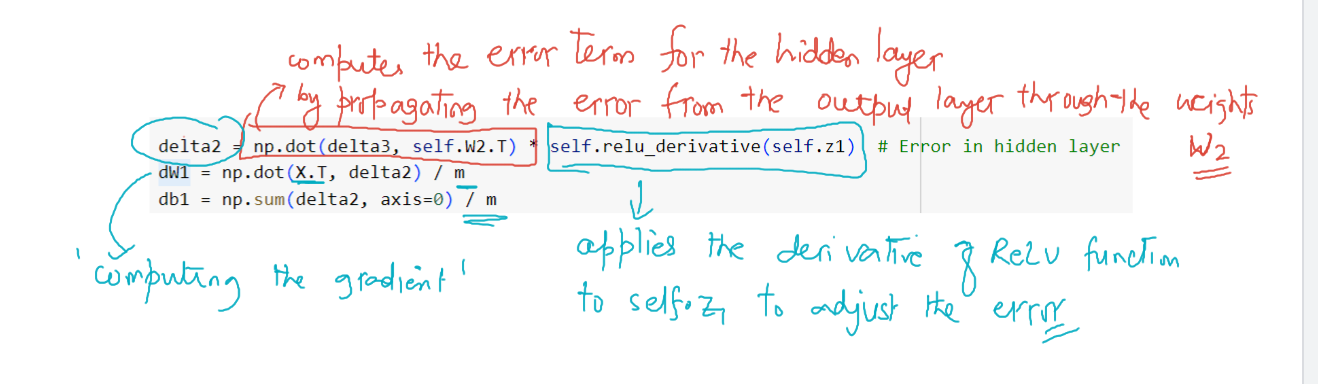

## Load the IRIS dataset

In [239]:
iris = load_iris()
X = iris.data[:100, [2,3]] # Using Sepal Width and Petal Width as features
y = iris.target

In [240]:
# ### Binary classification: Convert to labels (1 for class 1, 0 for classes and 0 and 2)
# y_binary = np.where(y==1, 1,0)

In [241]:
y = y[:100]

## Split the data into training and test sets

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Source code behind some of `scikit` functions

In [255]:
import inspect
from sklearn.model_selection import train_test_split

# Print the source code of train_test_split
print(inspect.getsource(train_test_split))


@validate_params(
    {
        "test_size": [
            Interval(RealNotInt, 0, 1, closed="neither"),
            Interval(numbers.Integral, 1, None, closed="left"),
            None,
        ],
        "train_size": [
            Interval(RealNotInt, 0, 1, closed="neither"),
            Interval(numbers.Integral, 1, None, closed="left"),
            None,
        ],
        "random_state": ["random_state"],
        "shuffle": ["boolean"],
        "stratify": ["array-like", None],
    },
    prefer_skip_nested_validation=True,
)
def train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
):
    """Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cr

In [244]:
print(X_train.shape, X_test.shape)

(70, 2) (30, 2)


##Standardize the features

In [245]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# Initialize the neural network (MLP)

In [246]:
mlp_nn = NeuralNetwork(input_size=2,hidden_size=12, output_size=1, learning_rate=0.001, epochs=100) #creating a neural network object

`input_size` : indicates there are 2 input features or dimensions or input vars in the input data

`hidden_size` : indicates there are 5 neurons in the hidden layer of the neural network

`output_size` : indicates there is one neuron in the  output layer of the neural network

`learning_rate = 0.01` : Determines how much weights are updated during the training

`epochs = 100 ` : Specifies the number of times the entire dataset is passed forward and backward through the neural network during training

### Train the neural network `mlp_nn`

In [247]:
mlp_nn.train(X_train_std, y_train)

Epoch 0, Loss: 1.0381
Epoch 10, Loss: 1.0321
Epoch 20, Loss: 1.0263
Epoch 30, Loss: 1.0207
Epoch 40, Loss: 1.0152
Epoch 50, Loss: 1.0100
Epoch 60, Loss: 1.0050
Epoch 70, Loss: 1.0001
Epoch 80, Loss: 0.9954
Epoch 90, Loss: 0.9909


### Predict on the test set

In [248]:
y_pred = mlp_nn.predict(X_test)

### Performance Metrics

In [249]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [250]:
print('Accuracy:', accuracy_score(y_pred, y_test)*100)

Accuracy: 56.666666666666664


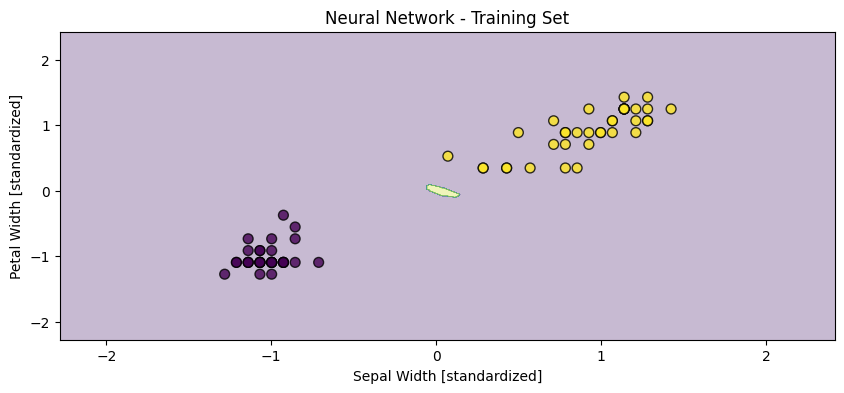

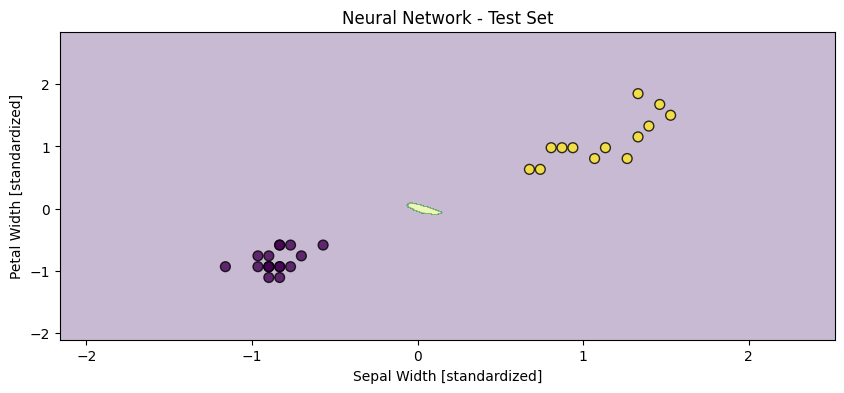

In [251]:
# Function to plot decision regions
def plot_decision_regions(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', s=50, alpha=0.8)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Plotting the decision regions
plt.figure(figsize=(10, 4))
plot_decision_regions(X_train_std, y_train, mlp_nn)
plt.title('Neural Network - Training Set')
plt.xlabel('Sepal Width [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.show()

plt.figure(figsize=(10, 4))
plot_decision_regions(X_test_std, y_test, mlp_nn)
plt.title('Neural Network - Test Set')
plt.xlabel('Sepal Width [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.show()

# # Plotting the loss history
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(mlp_nn.loss_history) + 1), mlp_nn.loss_history, marker='o')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Neural Network - Training Loss')
# plt.show()


In [206]:
mlp_nn.loss_history

[0.7078312464923638,
 0.7080636755137585,
 0.7082991293297726,
 0.7085386909848713,
 0.7087809519877083,
 0.7090259296733719,
 0.7092736414088354,
 0.709524104590641,
 0.7097773366425609,
 0.7100333550132442,
 0.7102921771738396,
 0.7105538206156037,
 0.7108183028474879,
 0.7110856413937082,
 0.7113558537912971,
 0.7116289575876366,
 0.7119045213251622,
 0.7121826183958093,
 0.7124636537779019,
 0.7127476450160648,
 0.7130346096534487,
 0.7133245652291762,
 0.7136175292757715,
 0.7139135193165754,
 0.7142125528631456,
 0.7145146474126411,
 0.7148198204451938,
 0.7151280894212655,
 0.7154394717789921,
 0.7157539849315137,
 0.7160716462642938,
 0.7163922094086606,
 0.7167154152704106,
 0.7170418077858414,
 0.7173714042068361,
 0.7177042217443682,
 0.7180402775657713,
 0.7183795887920038,
 0.7187221724949029,
 0.7190680456944316,
 0.7194172253559168,
 0.7197697283872818,
 0.7201255716362706,
 0.7204847718876686,
 0.720847345860516,
 0.7212133301126415,
 0.7215833318849959,
 0.721956763240

In [256]:
import inspect
from sklearn.tree import DecisionTreeClassifier

# Print the source code of DecisionTreeClassifier
print(inspect.getsource(DecisionTreeClassifier))


class DecisionTreeClassifier(ClassifierMixin, BaseDecisionTree):
    """A decision tree classifier.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"gini", "entropy", "log_loss"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "log_loss" and "entropy" both for the
        Shannon information gain, see :ref:`tree_mathematical_formulation`.

    splitter : {"best", "random"}, default="best"
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose the best split and "random" to choose
        the best random split.

    max_depth : int, default=None
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.

    min_samples_split : int or float, default=2
        The minimum number of 